# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('Wholesale_Data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.shape

(440, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
num_missing = data.isna().sum()
num_missing

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
## Looking for duplicates
bool_series = data.duplicated()
bool_series

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


<Axes: xlabel='Delicassen', ylabel='Density'>

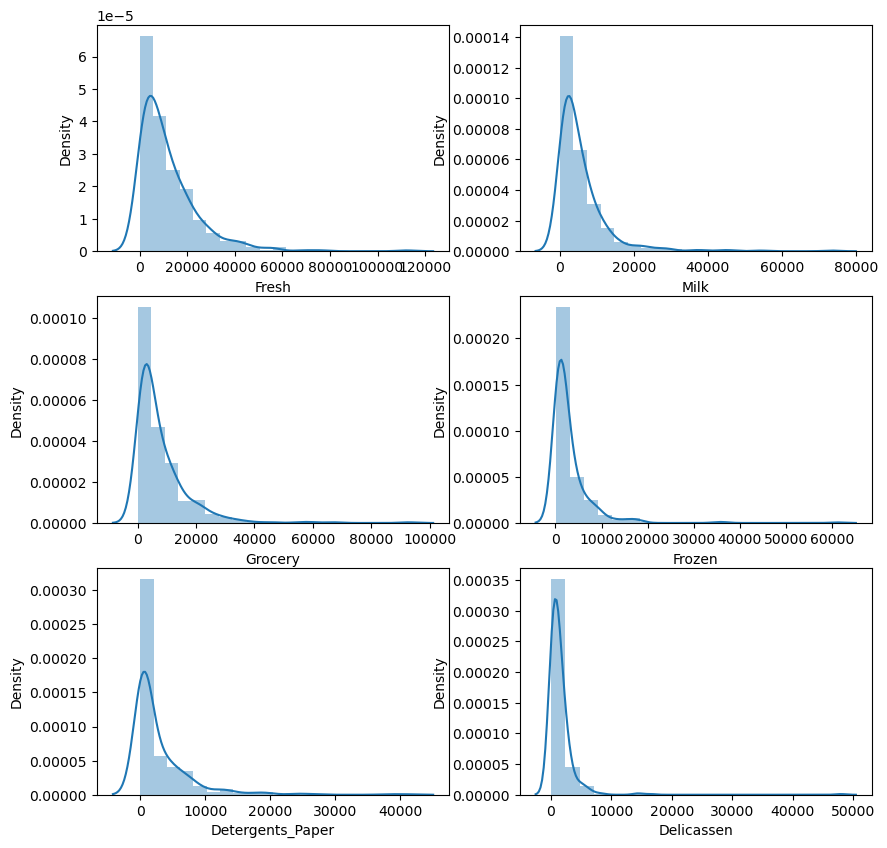

In [9]:
## Distributions per variables
## The distributions seems to be rigth-skwed because is longer in the rigth side of their peaks. Most of their mean are greater than their median. Positive skew.
fig, ax = plt.subplots(3,2, figsize=(10,10))
sns.distplot(data.Fresh, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Milk, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Grocery, bins = 20, ax=ax[1,0]) 
sns.distplot(data.Frozen, bins = 20, ax=ax[1,1]) 
sns.distplot(data.Detergents_Paper, bins = 20, ax=ax[2,0])
sns.distplot(data.Delicassen, bins = 20, ax=ax[2,1])

Channel                Axes(0.125,0.53;0.168478x0.35)
Region              Axes(0.327174,0.53;0.168478x0.35)
Fresh               Axes(0.529348,0.53;0.168478x0.35)
Milk                Axes(0.731522,0.53;0.168478x0.35)
Grocery                Axes(0.125,0.11;0.168478x0.35)
Frozen              Axes(0.327174,0.11;0.168478x0.35)
Detergents_Paper    Axes(0.529348,0.11;0.168478x0.35)
Delicassen          Axes(0.731522,0.11;0.168478x0.35)
dtype: object

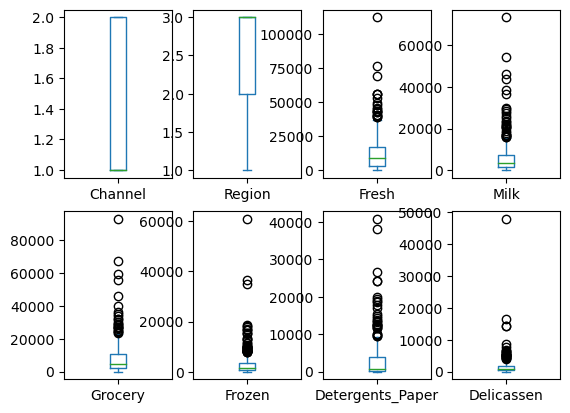

In [10]:
##Checking for Outliers
data.plot(kind = 'box', subplots = True, layout = (2, 4), sharex = False)


In [11]:
df1 = data

In [12]:
## Applying natural log to normalize distribution
df3 = np.log(df1)
df3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...,...,...
435,0.000000,1.098612,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,0.000000,1.098612,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,0.693147,1.098612,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,0.000000,1.098612,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


<Axes: xlabel='Delicassen', ylabel='Density'>

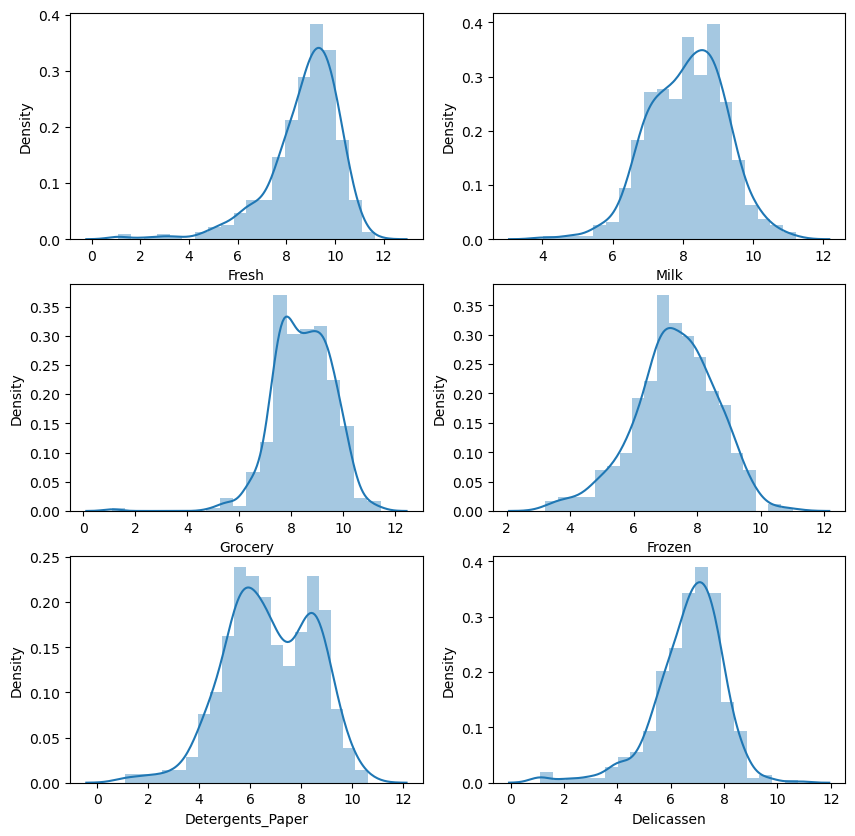

In [13]:
## Distributions after natural log
fig, ax = plt.subplots(3,2, figsize=(10,10))
sns.distplot(df3.Fresh, bins = 20, ax=ax[0,0]) 
sns.distplot(df3.Milk, bins = 20, ax=ax[0,1]) 
sns.distplot(df3.Grocery, bins = 20, ax=ax[1,0]) 
sns.distplot(df3.Frozen, bins = 20, ax=ax[1,1]) 
sns.distplot(df3.Detergents_Paper, bins = 20, ax=ax[2,0])
sns.distplot(df3.Delicassen, bins = 20, ax=ax[2,1])

In [14]:
## After natural log applied
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,0.223697,0.324429,0.000000,0.000000,0.000000,0.693147,0.693147
Region,440.0,0.863044,0.416749,0.000000,0.693147,1.098612,1.098612,1.098612
Fresh,440.0,8.730544,1.480071,1.098612,8.048059,9.048286,9.737064,11.627601
Milk,440.0,8.121047,1.081365,4.007333,7.334981,8.196159,8.880480,11.205013
Grocery,440.0,8.441169,1.116172,1.098612,7.674616,8.467057,9.273854,11.437986
Frozen,440.0,7.301396,1.284540,3.218876,6.609678,7.330388,8.175896,11.016479
Detergents_Paper,440.0,6.785972,1.721020,1.098612,5.548101,6.705018,8.274341,10.617099
Delicassen,440.0,6.665133,1.310832,1.098612,6.011875,6.872645,7.506728,10.777768


Channel                Axes(0.125,0.53;0.168478x0.35)
Region              Axes(0.327174,0.53;0.168478x0.35)
Fresh               Axes(0.529348,0.53;0.168478x0.35)
Milk                Axes(0.731522,0.53;0.168478x0.35)
Grocery                Axes(0.125,0.11;0.168478x0.35)
Frozen              Axes(0.327174,0.11;0.168478x0.35)
Detergents_Paper    Axes(0.529348,0.11;0.168478x0.35)
Delicassen          Axes(0.731522,0.11;0.168478x0.35)
dtype: object

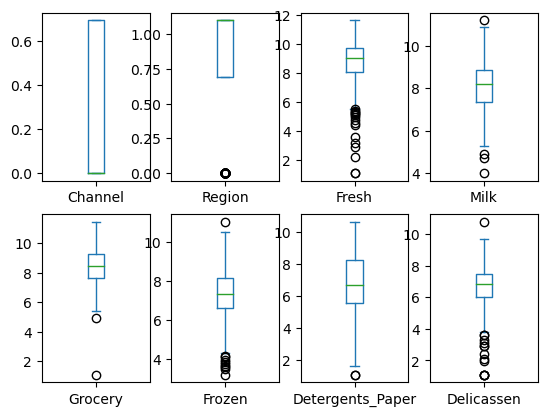

In [15]:
##Checking for Outliers after natura log applied
df3.plot(kind = 'box', subplots = True, layout = (2, 4), sharex = False)

In [16]:
df4 = df3

In [17]:
## Finding Interquartile Range to identify and removed outliers
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR


In [18]:
## Outliers
mask1 = df4 > upper
mask2 = df4 < lower

In [19]:
## Outliers
mask_combined = (mask1 | mask2).any(axis=1)
df4[mask_combined]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,0.693147,1.098612,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,0.693147,1.098612,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,0.000000,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
...,...,...,...,...,...,...,...,...
357,0.693147,1.098612,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480
412,0.000000,1.098612,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134
420,0.000000,1.098612,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,0.000000,1.098612,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446


In [20]:
## Dataframe after outliers removed
data2 = df4[~mask_combined]

In [21]:
data2.shape

(325, 8)

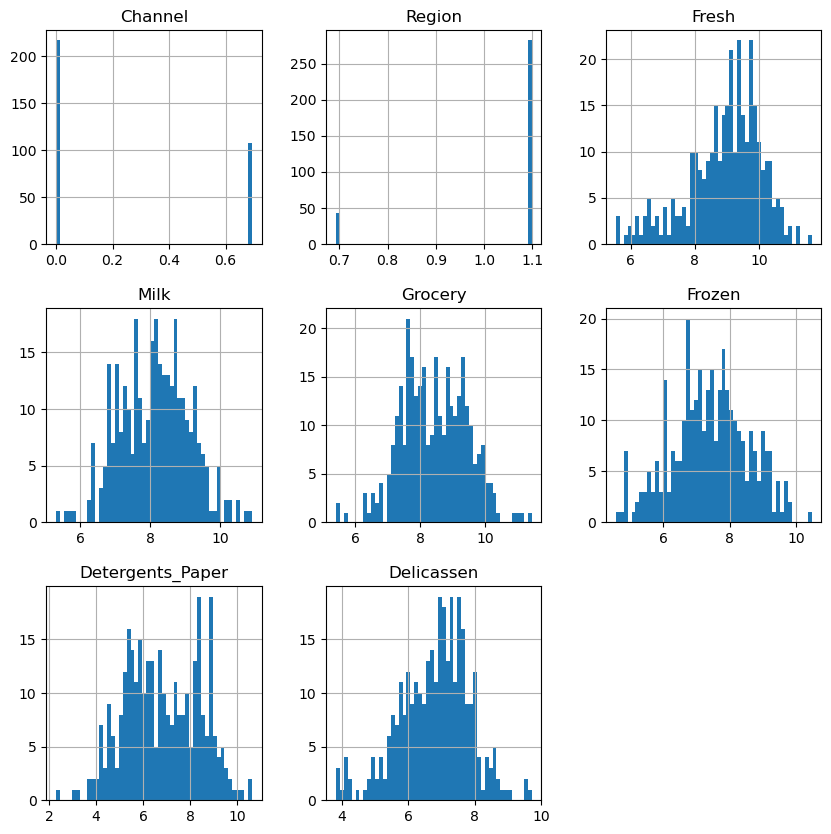

In [22]:
data2.hist(figsize=(10,10),bins=50)
plt.show()

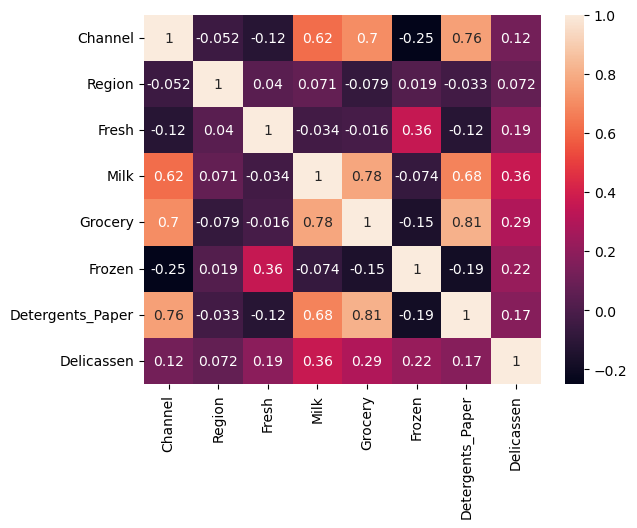

In [23]:
corr_matrix = data2.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [24]:
data3 = data2

In [25]:
### Applying Standard Scaler
from sklearn.preprocessing import StandardScaler


In [26]:
std_scale = StandardScaler().fit_transform(data3)

scaled_frame = pd.DataFrame(std_scale, columns=data3.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.417483,0.39049,0.446966,1.061831,0.495055,-1.771932,0.676151,0.377511
1,1.417483,0.39049,-0.068307,1.077964,0.731294,0.069262,0.807756,0.648187
2,1.417483,0.39049,-0.160852,0.968111,0.511248,0.340958,0.849170,2.067942
3,-0.705476,0.39049,0.487448,-1.067675,-0.089903,1.196280,-0.374812,0.654623
4,1.417483,0.39049,0.957235,0.471153,0.445683,0.766505,0.417870,1.672254


In [27]:
scaled_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,325.0,1.421085e-16,1.001542,-0.705476,-0.705476,-0.705476,1.417483,1.417483
Region,325.0,1.661577e-15,1.001542,-2.560886,0.390490,0.390490,0.390490,0.390490
Fresh,325.0,1.967657e-16,1.001542,-2.992352,-0.543714,0.182746,0.707102,2.367282
Milk,325.0,-1.147800e-15,1.001542,-2.886041,-0.764602,0.059535,0.693756,2.821831
Grocery,325.0,1.322703e-15,1.001542,-3.040780,-0.754329,-0.003184,0.754721,3.010997
Frozen,325.0,-1.967657e-16,1.001542,-2.472023,-0.614877,0.010317,0.668146,2.679802
Detergents_Paper,325.0,4.372571e-17,1.001542,-2.856141,-0.787255,-0.070163,0.883456,2.398936
Delicassen,325.0,6.777485e-16,1.001542,-2.843867,-0.674706,0.124665,0.677338,2.780030


<Axes: ylabel='Density'>

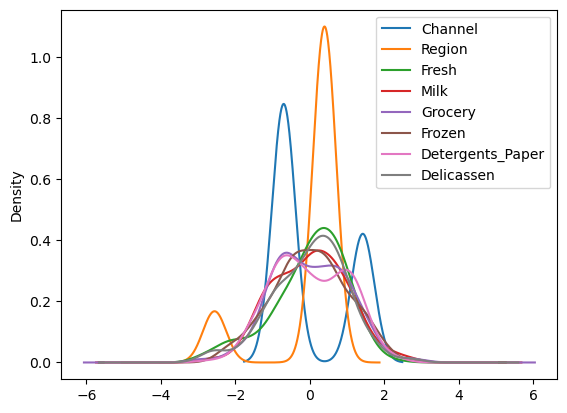

In [28]:
pd.DataFrame(scaled_frame).plot(kind='kde')

In [29]:
## Removing columns: Channel and Region 
data5 =  scaled_frame.drop(['Channel','Region'],axis =1)
data5

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.446966,1.061831,0.495055,-1.771932,0.676151,0.377511
1,-0.068307,1.077964,0.731294,0.069262,0.807756,0.648187
2,-0.160852,0.968111,0.511248,0.340958,0.849170,2.067942
3,0.487448,-1.067675,-0.089903,1.196280,-0.374812,0.654623
4,0.957235,0.471153,0.445683,0.766505,0.417870,1.672254
...,...,...,...,...,...,...
320,0.691866,0.143206,0.550936,-0.752038,0.600140,-0.069728
321,1.197318,1.287739,1.248937,1.823648,-1.022337,0.854557
322,1.442250,-0.884771,-1.805104,0.890066,-1.446691,0.914236
323,0.567720,1.543572,1.886134,-1.148407,1.759347,0.695948


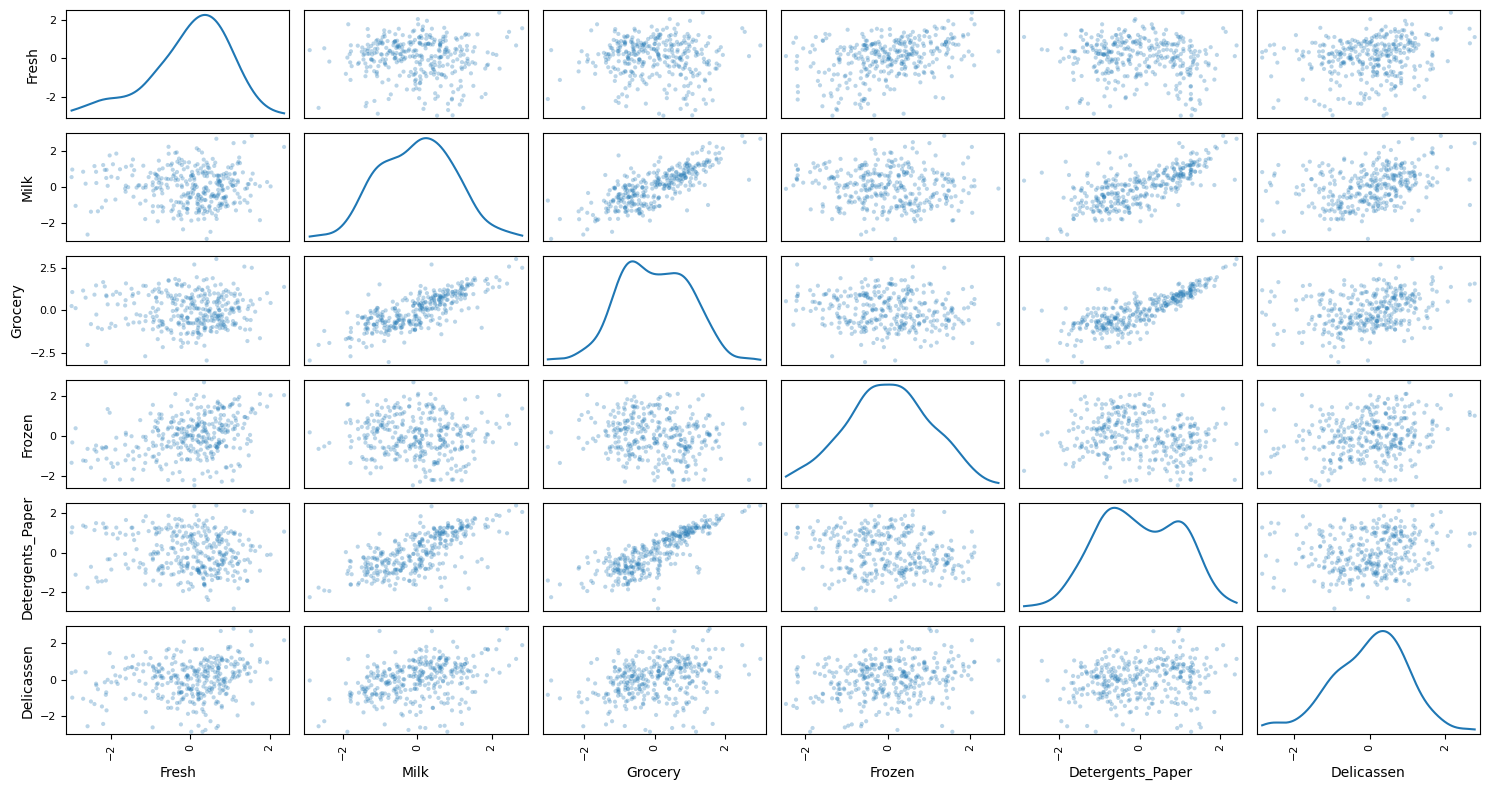

In [30]:
pd.plotting.scatter_matrix(data5, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [31]:
X2 = data5
X2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.446966,1.061831,0.495055,-1.771932,0.676151,0.377511
1,-0.068307,1.077964,0.731294,0.069262,0.807756,0.648187
2,-0.160852,0.968111,0.511248,0.340958,0.849170,2.067942
3,0.487448,-1.067675,-0.089903,1.196280,-0.374812,0.654623
4,0.957235,0.471153,0.445683,0.766505,0.417870,1.672254
...,...,...,...,...,...,...
320,0.691866,0.143206,0.550936,-0.752038,0.600140,-0.069728
321,1.197318,1.287739,1.248937,1.823648,-1.022337,0.854557
322,1.442250,-0.884771,-1.805104,0.890066,-1.446691,0.914236
323,0.567720,1.543572,1.886134,-1.148407,1.759347,0.695948


In [32]:
from sklearn.cluster import KMeans

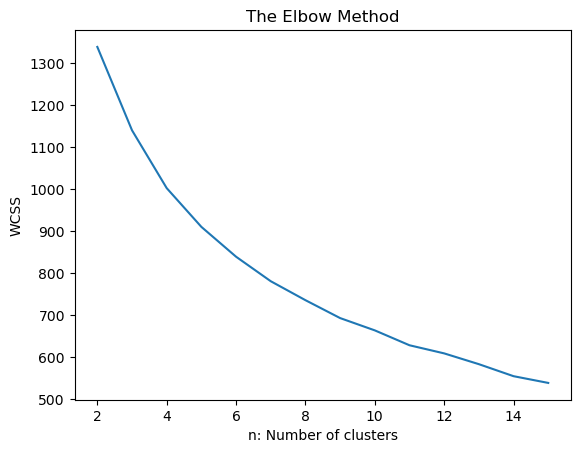

In [66]:
###Elbow method to find the optimal K value. 
### WCSS (within-cluster sum of square) is the sum of the squared distance between ea point and the centroid in a cluster
###In this case the elbow shape is not that clear but seems to be around 10
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
 
plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('n: Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
##Train the model
kmeans = KMeans(n_clusters = 10, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X2)

In [68]:
kmeans.cluster_centers_

array([[-1.98774036e+00,  7.77078074e-01,  9.57938624e-01,
        -1.16762259e+00,  1.20062358e+00, -4.33473462e-01,
        -1.04083409e-17],
       [ 5.61672033e-01, -5.46815217e-01, -5.30420109e-01,
        -2.61945992e-01, -9.83117230e-01, -6.74537394e-02,
         6.93889390e-18],
       [ 2.28442393e-01,  6.33006383e-01,  7.57586178e-01,
        -7.08721677e-01,  8.28102201e-01,  7.69147545e-01,
         2.56410256e-02],
       [-1.10424708e+00,  5.76602639e-02, -4.18207284e-01,
        -3.19955471e-01, -4.83534294e-01,  3.72866252e-01,
         3.46944695e-18],
       [-4.95235017e-01, -1.40229188e+00, -1.39578814e+00,
        -1.05272626e-01, -9.92184392e-01, -1.04480809e+00,
         3.46944695e-18],
       [ 1.02684904e+00,  3.84660046e-01,  3.67380065e-01,
         1.13866937e+00,  1.61433117e-02,  9.41931215e-01,
         3.22580645e-02],
       [ 4.35282219e-01, -7.05475260e-01, -7.51831449e-01,
         1.11444014e+00, -6.23233596e-01, -1.17075204e-01,
         1.0408340

In [69]:
## Inertia seems to be higher if reducing the number of clusters
kmeans.inertia_

663.281981943415

In [70]:
##Count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

6    52
1    43
2    39
9    36
4    36
3    34
5    31
8    28
0    20
7     6
dtype: int64

In [74]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit_predict(X2)



In [73]:
## Inertia is still high
kmeans.inertia_

618.4512620924902

In [75]:
pd.Series(kmeans.labels_).value_counts()

5    54
9    52
0    39
2    32
4    27
8    27
3    26
1    23
6    23
7    22
dtype: int64

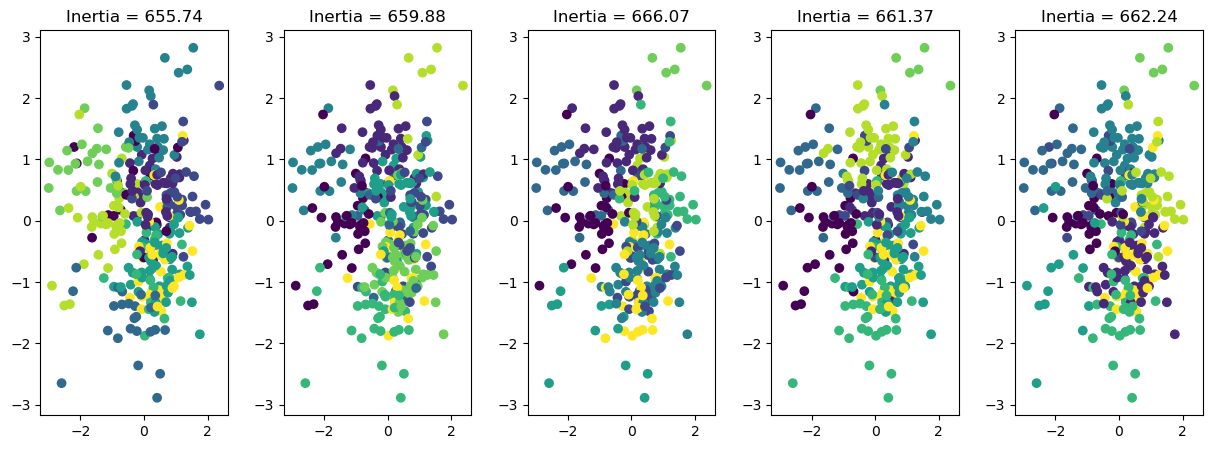

In [77]:
## Cluster visualization

fig, ax = plt.subplots(1, 5, gridspec_kw={'wspace': 0.3}, figsize=(15,5))
for i in range(5):
    km = KMeans(n_clusters = 10, init='k-means++', random_state=i)
    km.fit(X2)
    ax[i].scatter(x= X2.iloc[:, 0], y=X2.iloc[:, 1], c= km.labels_)
    ax[i].set_title(f"Inertia = {round(km.inertia_, 2)}")

In [78]:
## Silhouette Score to verufy the number of clusters defined by the elbow method
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 10)
km.fit(X2)
silhouette_score(X2, km.labels_)

0.17900697230067714

In [79]:
sil_scores = [] 
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=42)
    km.fit(X2)
    sil_scores.append(silhouette_score(X2, km.labels_))

Text(0, 0.5, 'Silhouette score')

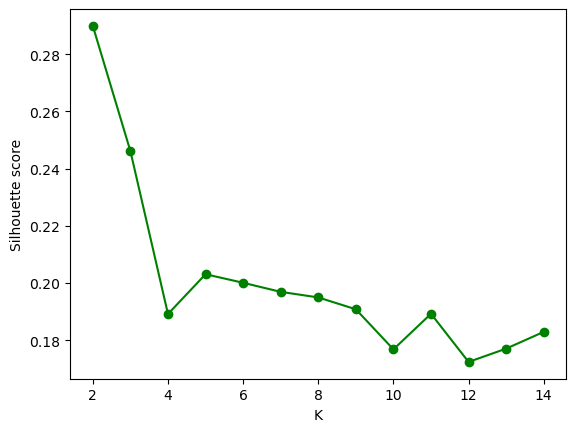

In [80]:
plt.plot(range(2,15), sil_scores, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score")

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

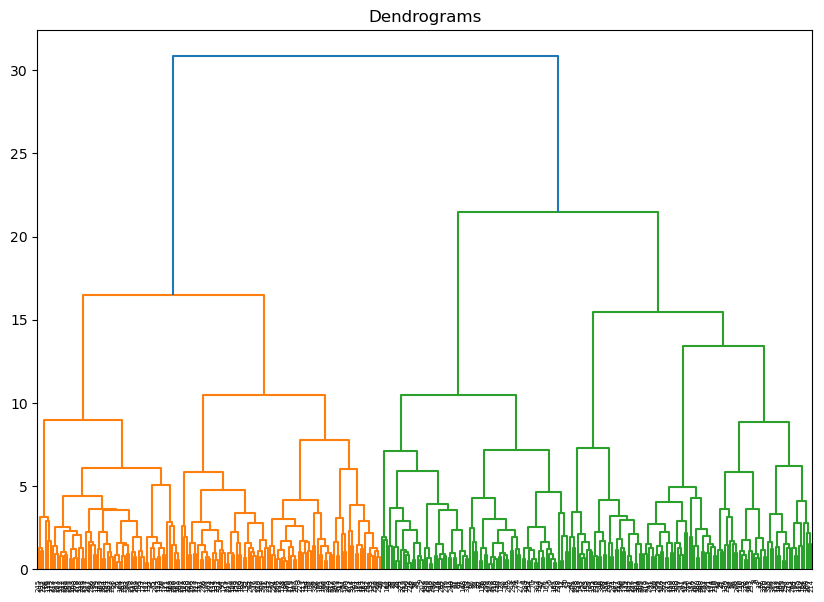

In [43]:
## Dendrograms to try to decide number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data5, method='ward'))

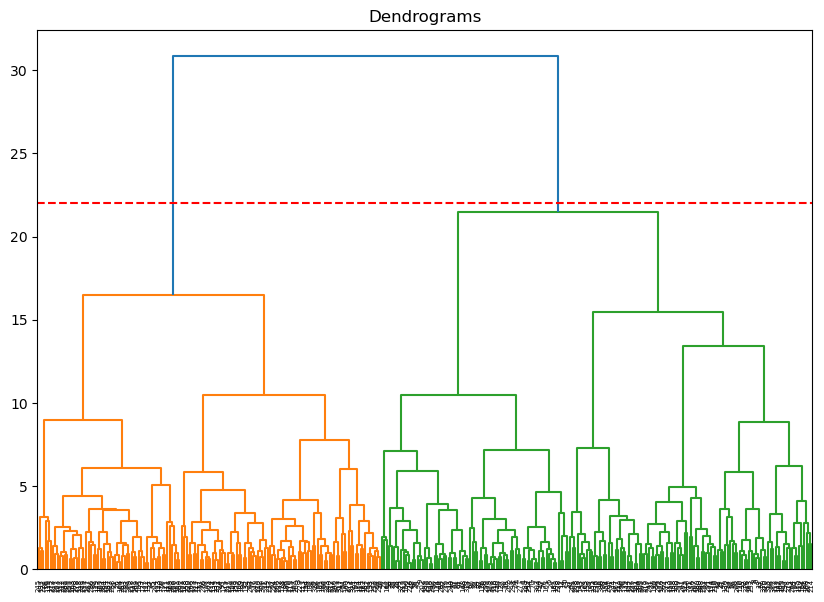

In [44]:
## The treshhold will be 22
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data5, method='ward'))
plt.axhline(y=22, color='r', linestyle='--')

In [45]:
## There are two clusters as the line cut the dendrogram in two points
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data5)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(data5, method="complete", metric="euclidean")
average_clustering = linkage(data5, method="average", metric="euclidean")
single_clustering = linkage(data5, method="single", metric="euclidean")

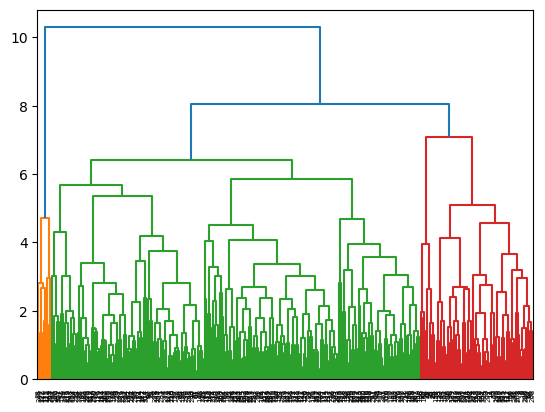

In [47]:
## Complete linkage generates just two clusters
dendrogram(complete_clustering)
plt.show()

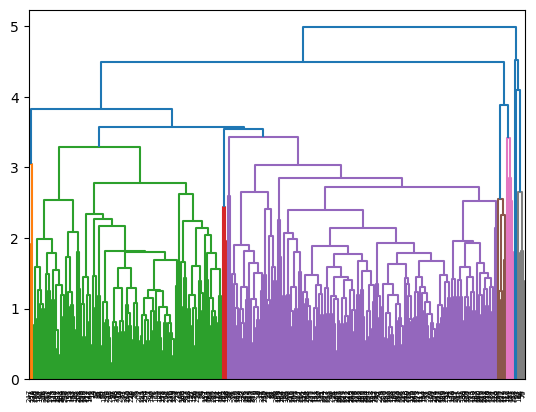

In [48]:
## Average linkage generates just two clusters
dendrogram(average_clustering)
plt.show()

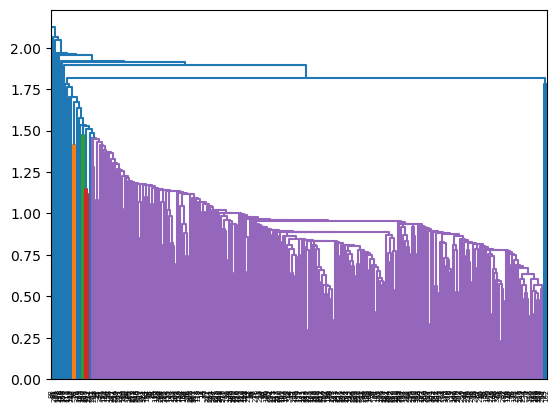

In [49]:
## Single linkage generates just one cluster
dendrogram(single_clustering)
plt.show()

In [50]:
## Next are some visualizations at what these clusters mean .
## Per example in the image below it can be observed that customers from cluster zero spent less than the ones in cluster 1

<Axes: xlabel='Cluster', ylabel='Milk'>

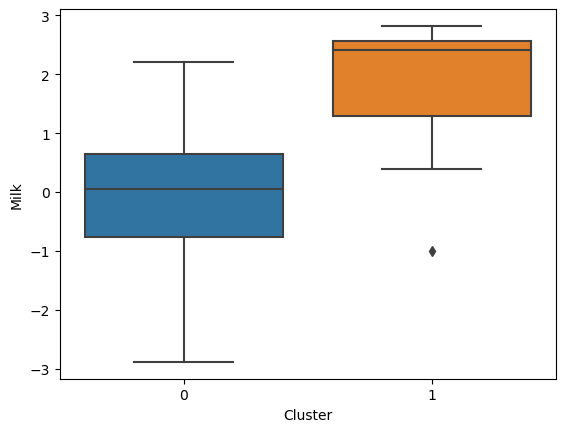

In [51]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
data5["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='Milk', data=data5)

<Axes: xlabel='Cluster', ylabel='Grocery'>

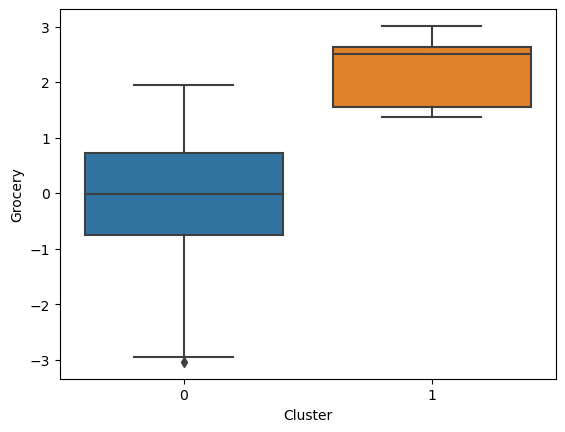

In [52]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
data5["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='Grocery', data=data5)

<Axes: xlabel='Cluster', ylabel='Frozen'>

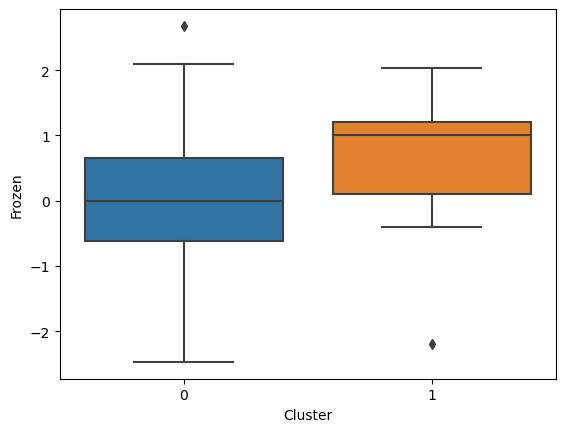

In [53]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
data5["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='Frozen', data=data5)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [54]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca.fit(data5)

PCA(n_components=3)

In [55]:
pca.components_

array([[-0.05159739,  0.54530944,  0.57231658, -0.11657699,  0.54203322,
         0.25352226,  0.02766439],
       [ 0.6022186 ,  0.06901721,  0.0037497 ,  0.62449055, -0.10751877,
         0.48000318,  0.02456704],
       [ 0.66261029, -0.01276254,  0.17150697, -0.06856698,  0.20523633,
        -0.69604929,  0.00787875]])

In [56]:
pca.explained_variance_

array([2.68235664, 1.54244737, 0.72852113])

In [57]:

print("Explained variance is:",pca.explained_variance_)
print("Explained variance ratio",pca.explained_variance_ratio_)
print("Cumulative variance explained", pca.explained_variance_ratio_.cumsum())

Explained variance is: [2.68235664 1.54244737 0.72852113]
Explained variance ratio [0.44412392 0.25538654 0.12062291]
Cumulative variance explained [0.44412392 0.69951046 0.82013337]


In [58]:
## PCA conclusion:
## n_components = 3 is the preference number since, represent around 82% of the adding variance

### Note: 
### The explained variance ratio is the percentage of variance that is attributed by each of the selected components.
### Preference is to choose the number of components to include in the  model by adding the explained variance ratio of each component until reach
### a total of around 0.8 or 80% to avoid overfitting.


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [59]:
##Refresh note: The data set refers to clients of a wholesale distributor and it included the annual spending in monetary units on diverse product categories

### Conclusions:
## Hierarchical clustering did a better job in segregating customers 
## Hierarchical clustering presented a cleaner output. The number of clusters were 2 vs 11 in the KM clustering model
## K Means cluster visualization not  very intelligible due the two dimensions 
## In the KM clustering model was not clear what was the optimal number of clusters. The elbow method did not show a clear elbow shape
## The PCA method showed that just 3 components where enough to best describe customers. Since 3 components best maximize variance
## For future analysis some option will be to use a different method to deal with outliers, since the IQR resulted in removing a high number of rows, and then revisit the models with this new dataset.
## And other option for future an analysis could be to try to segregate in a different way (remove more columns or add dummy columns).
